# Importing relevant libraries and modules

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

### Importing dataset of the COVID-19 cases in India till 9th April 2020

In [523]:
df=pd.read_csv(r"C:\Users\Ishu Agarwal\Downloads\covid19-in-india\covid_19_india.csv", skipfooter=5)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


### Scraping the dataset

In [543]:
df=df[['Date','Confirmed']]
df=df.groupby('Date').agg(sum)
df=df.reset_index()
df['Date_datetime']=pd.to_datetime(df['Date'], dayfirst=True)
df=df.sort_values('Date_datetime').reset_index(drop=True)
df.head()

,Date,Confirmed,Date_datetime
0,30/01/20,1,2020-01-30
1,31/01/20,1,2020-01-31
2,01/02/20,2,2020-02-01
3,02/02/20,3,2020-02-02
4,03/02/20,3,2020-02-03


### Plotting the dataset

<IPython.core.display.Javascript object>


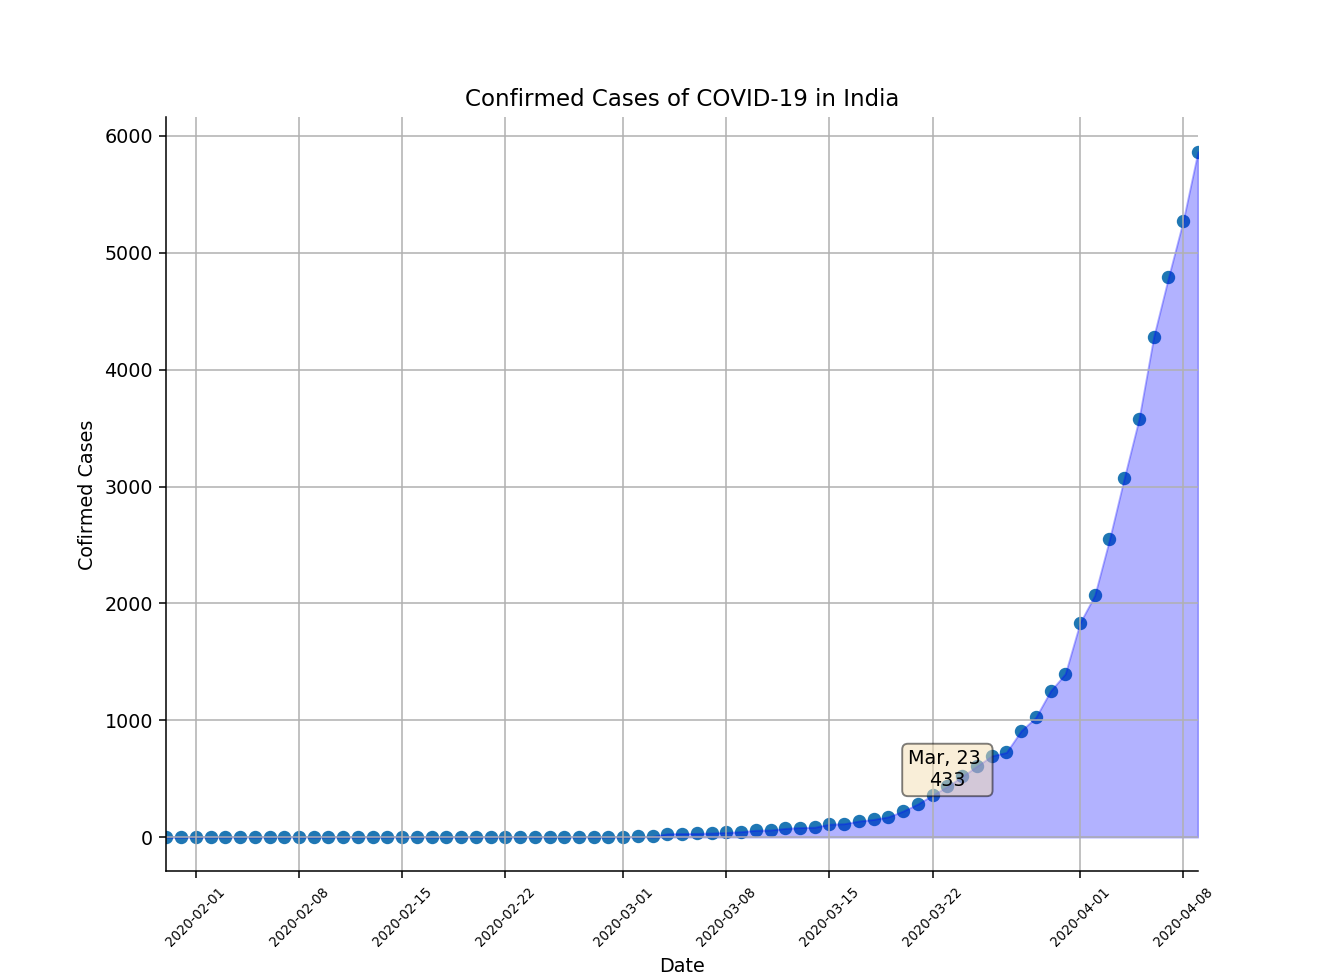

(737454.0, 737524.0)

In [536]:
%matplotlib notebook
plt.scatter(df['Date_datetime'], df['Confirmed'], picker=5)
plt.xlabel('Date')
plt.ylabel('Cofirmed Cases')
plt.title('Confirmed Cases of COVID-19 in India')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.fill_between(df['Date_datetime'], df['Confirmed'],alpha=0.3,color='b')
plt.grid('on')
plt.xticks(rotation=45,fontsize='x-small')
d={'01':'Jan, ', '02':'Feb, ', '03':'Mar, ', '04':'Apr, '}
plt.xlim([df.iloc[0,-1], df.iloc[-1,-1]])

### Function for event occur

In [538]:
def onpick(event):
    plt.cla()
    plt.scatter(df['Date_datetime'], df['Confirmed'], picker=5)
    plt.xlabel('Date')
    plt.ylabel('Cofirmed Cases')
    plt.title('Confirmed Cases of COVID-19 in India')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.fill_between(df['Date_datetime'], df['Confirmed'],alpha=0.3,color='b')
    plt.grid('on')
    plt.xticks(rotation=45,fontsize='x-small')
    plt.xlim([df.iloc[0,-1], df.iloc[-1,-1]])
    x=df.iloc[event.ind[0],2]
    y=df.iloc[event.ind[0],1]
    date=df.iloc[event.ind[0],0]
    lst=date.split('/')
    l=d[lst[1]]
    box={'boxstyle':"round", 'facecolor':'wheat', 'alpha':0.5}
    plt.gca().text(x, y, l+lst[0]+' \n{}'.format(y), ha='center', bbox=box)


In [539]:
plt.gcf().canvas.mpl_connect('pick_event', onpick);    